# Battle of the Neighbourhood Code

## Introduction:

New York City is seen as a business hub with a variety of people. Whilst being a business district and hub, New York is in a major hunt to ensure all locals have the opportunity to gym due to the lack of open space available. A new gym franchise is looking to open a gym in one of New York’s neighbourhoods. The franchise does not understand the area and the availability of gyms in each neighbourhood and requires an investigation to take place in order to determine the best place for the franchise to open a new gym.

## Data Requirements and sources:

For the Project the following data sources will be used:
    1. Wikipedia to obtain density of each Borough in New York city
    2. New York City data that contains list Boroughs, Neighbourhoods along with their latitude and longitude.
    3. Gyms in each neighbourhood of New York city.
    4. Geo Space data


## Decisions metrics:

The following decision metrics are requested in order to make an informed decision:
    1. Density of people for each Borough
    2. Number of Neighborhoods in each Borough
    3. Number of gyms in each Borough
    4. Gyms in the Neighborhood with the best density metric per gym
    5. Cluster Gyms in Neighborhood with the best density metric per gym

## Methodology:

The following methodology is used to determine the Key decision metrics:
    1. Scrap wikipedia page to get the denisity of each Borough "https://en.wikipedia.org/wiki/New_York_City"
    2. We begin by collecting the New York city data from "https://cocl.us/new_york_dataset".
    3. We will find all gyms for each neighborhood using FourSquare API.
    4. Get combine data to determine highest denisty of people per gym in each Borough
    5. Evaluate best Borough gyms and determine best cluster.
    6. Visualise the best borough with the gyms to visually see spread

# Code to help the decision metrics be realised:

## Import standard library

In [77]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


## Get New York Boroughs density per km2

### Scraping data off wikipedi for population density

In [3]:
import requests
from bs4 import BeautifulSoup
url = "https://en.wikipedia.org/wiki/New_York_City"
page = requests.get(url).text
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   New York City - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"8524dd2a-aa78-47c3-8220-3dac6ad54aaa","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"New_York_City","wgTitle":"New York City","wgCurRevisionId":953376699,"wgRevisionId":953376699,"wgArticleId":645042,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Wikipedia articles incorporating a citation from the 1911 Encyclopaedia Britannica with Wikisource reference","Webarchive template wayback links","CS1 m

## Get Table

In [4]:
Primary_table = soup.find('table',{'class':'wikitable sortable'})
Primary_table

<table border="1" class="wikitable sortable" style="float:center; text-align:right; font-size:85%; margin:1em;">
<tbody><tr>
<th colspan="9" style="background-color:tan;"><div style="text-align:center; position:relative; white-space:nowrap;">New York City's <a href="/wiki/Boroughs_of_New_York_City" title="Boroughs of New York City">five boroughs</a><div class="plainlinks hlist navbar mini" style="position:absolute; right:0; top:0; margin:0 5px;"><ul><li class="nv-view"><a href="/wiki/Template:NYC_boroughs" title="Template:NYC boroughs"><abbr title="View this template">v</abbr></a></li><li class="nv-talk"><a href="/wiki/Template_talk:NYC_boroughs" title="Template talk:NYC boroughs"><abbr title="Discuss this template">t</abbr></a></li><li class="nv-edit"><a class="external text" href="https://en.wikipedia.org/w/index.php?title=Template:NYC_boroughs&amp;action=edit"><abbr title="Edit this template">e</abbr></a></li></ul></div></div>
</th></tr>
<tr style="background:#dedebb;">
<th colspan=

## Into csv format

In [5]:
tabletext=""
for tr in Primary_table.find_all('tr'):
    row1=""
    for tds in tr.find_all('td'):
        row1=row1+","+tds.text
    tabletext=tabletext+row1[1:]
tabletext = tabletext.replace('\n,' , ',') 
print(tabletext)

The Bronx,
  Bronx,1,432,132,42.695,29,200,42.10,109.04,34,653,13,231
Brooklyn,
  Kings,2,582,830,91.559,34,600,70.82,183.42,37,137,14,649
Manhattan,
  New York,1,628,701,600.244,360,900,22.83,59.13,72,033,27,826
Queens,
   Queens,2,278,906,93.310,39,600,108.53,281.09,21,460,8,354
Staten Island,
   Richmond,476,179,14.514,30,300,58.37,151.18,8,112,3,132
City of New York,8,398,748,842.343,97,700,302.64,783.83,28,188,10,947
State of New York,19,745,289,1,701.399,85,700,47,214,122,284,416.4,159
Sources:[154] and see individual borough articles



## extract

In [173]:
#data = input_string
df = pd.DataFrame([x.split(',') for x in tabletext.split('\n')])
#df.columns = ["PostalCode","Borough","Neighborhood"]
df = df.iloc[0:10,0:13]
indexfind = df[ df[1] ==''].index
df.drop(indexfind , inplace=True)
df = df.reset_index(drop = True)
df.rename(columns={0: 'Borough', 1: 'A',2: 'B',3: 'C',4: 'D',5: 'E',6: 'F',7: 'G',8: 'H',9: 'I',10: 'J',11: 'K',12: 'L'}, inplace=True)
df.iloc[1,0] = 'Brooklyn' 
df.iloc[2,0] = 'Manhattan' 
df.iloc[4,0] = 'Staten Island' 
df.iloc[0,0] = 'Bronx' 
df.iloc[3,0] = 'Queens' 
df_fin_density = df[["Borough","J","K","L"]]
df_fin_density.iloc[4,3] = df_fin_density.iloc[4,2]
df_fin_density.iloc[4,2] = df_fin_density.iloc[4,1]
df_fin_density = df_fin_density[["Borough","K","L"]]
df_fin_density["L"] = df_fin_density["L"].astype(str).astype(int)
df_fin_density["K"] = df_fin_density["K"].astype(str).astype(int)
df_fin_density["K"] = df_fin_density["K"] * 1000
df_fin_density["Density"] = df_fin_density["K"] + df_fin_density["L"]
df_fin_density = df_fin_density[["Borough","Density"]]
df_fin_density
#dffin
#dffin.rename(columns={0: 'Borough', 1: 'Country',2: 'Neighborhood'}, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Borough,Density
0,Bronx,13231
1,Brooklyn,14649
2,Manhattan,27826
3,Queens,8354
4,Staten Island,3132


## Plot density per Borough

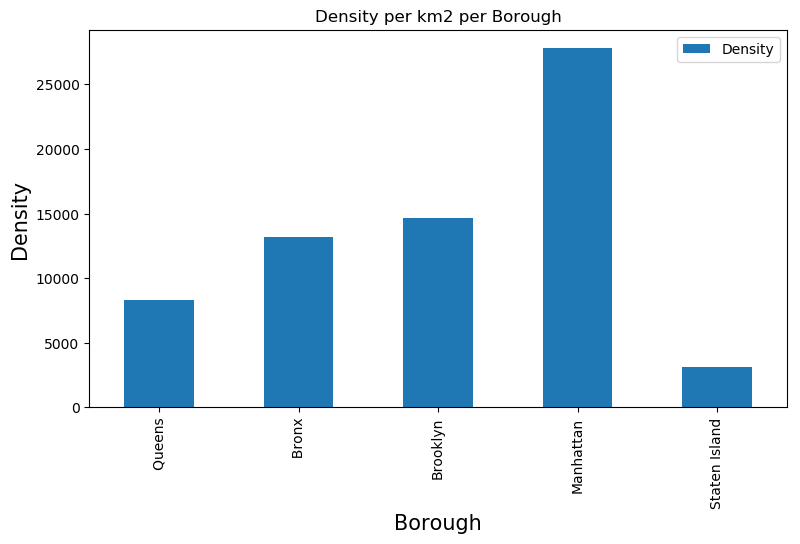

In [82]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Density per km2 per Borough')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Density', fontsize=15)
#giving a bar plot
df_fin_density.groupby('Borough')['Density'].sum().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

## Get Data off Foursquare

In [139]:
CLIENT_ID = '2ACQLFMDT1W5TQCPWSWZVTZCDRTJ5T04NMJQ1ZXOBUIYUM01' # your Foursquare ID
CLIENT_SECRET = 'VMHZRWNDMOC1FKENVJ02VGK0XRPUFGVSD3I2BLTIZHHFCH3L' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

def geo_location(address):
    # get geo location of address
    geolocator = Nominatim(user_agent="ny_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude

Your credentails:
CLIENT_ID: 2ACQLFMDT1W5TQCPWSWZVTZCDRTJ5T04NMJQ1ZXOBUIYUM01
CLIENT_SECRET:VMHZRWNDMOC1FKENVJ02VGK0XRPUFGVSD3I2BLTIZHHFCH3L


In [151]:
def get_venues(lat,lng):
    
    #set variables
    radius=1000
    LIMIT=100

    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [152]:

def get_venue_details(venue_id):
        
   
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [146]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

### Get New York data

In [101]:
def get_new_york_data():
    url='https://cocl.us/new_york_dataset'
    resp=requests.get(url).json()
    # all data is present in features label
    features=resp['features']
    
    # define the dataframe columns
    column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
    # instantiate the dataframe
    new_york_data = pd.DataFrame(columns=column_names)
    
    for data in features:
        borough = data['properties']['borough'] 
        neighborhood_name = data['properties']['name']
        
        neighborhood_latlon = data['geometry']['coordinates']
        neighborhood_lat = neighborhood_latlon[1]
        neighborhood_lon = neighborhood_latlon[0]
    
        new_york_data = new_york_data.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
    return new_york_data

In [102]:
new_york_df = get_new_york_data()

In [103]:
print(new_york_df.head())
print("the shape is",new_york_df.shape)

  Borough Neighborhood   Latitude  Longitude
0   Bronx    Wakefield  40.894705 -73.847201
1   Bronx   Co-op City  40.874294 -73.829939
2   Bronx  Eastchester  40.887556 -73.827806
3   Bronx    Fieldston  40.895437 -73.905643
4   Bronx    Riverdale  40.890834 -73.912585
the shape is (306, 4)


### Look at Neighbourhoods in each Borough

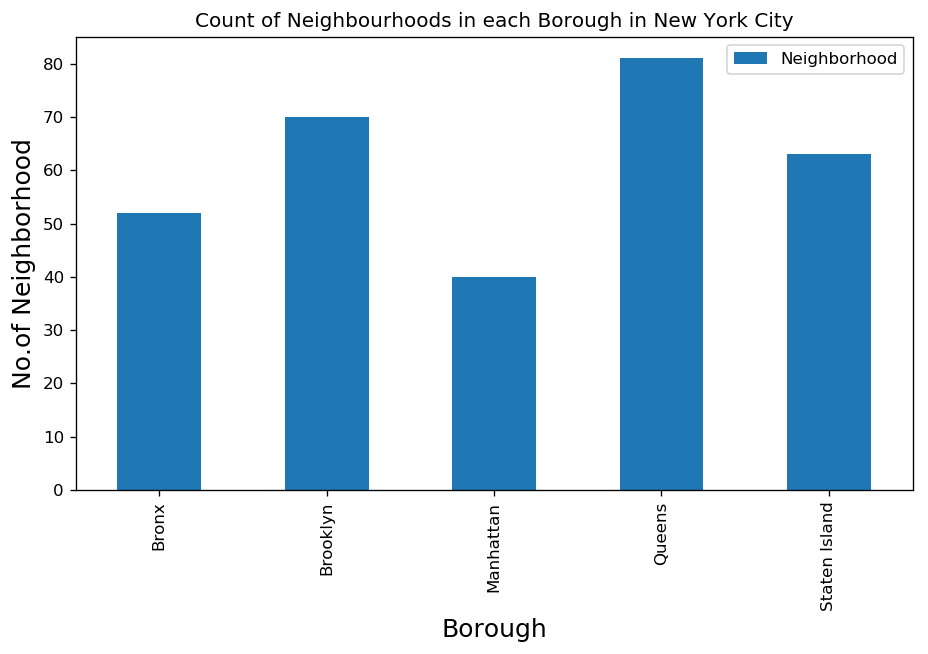

In [104]:
plt.figure(figsize=(9,5), dpi = 120)
# title
plt.title('Count of Neighbourhoods in each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
new_york_df.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

## Finally, get data from Foursquare on the gyms in each Borough

In [166]:
# prepare neighborhood list that contains indian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
gyms_rest_ny=pd.DataFrame(columns=column_names)
count=1
for row in new_york_df.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_venues(Latitude,Longitude)
    gyms=venues[venues['Category']=='Gym']   
    print('(',count,'/',len(new_york_df),')','Gyms in '+Neighborhood+', '+Borough+':'+str(len(gyms)))
    for gyms_detail in gyms.values.tolist():
        id, name , category=gyms_detail
        gyms_rest_ny = gyms_rest_ny.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1



( 1 / 306 ) Gyms in Wakefield, Bronx:0
( 2 / 306 ) Gyms in Co-op City, Bronx:0
( 3 / 306 ) Gyms in Eastchester, Bronx:1
( 4 / 306 ) Gyms in Fieldston, Bronx:0
( 5 / 306 ) Gyms in Riverdale, Bronx:0
( 6 / 306 ) Gyms in Kingsbridge, Bronx:2
( 7 / 306 ) Gyms in Marble Hill, Manhattan:2
( 8 / 306 ) Gyms in Woodlawn, Bronx:0
( 9 / 306 ) Gyms in Norwood, Bronx:2
( 10 / 306 ) Gyms in Williamsbridge, Bronx:1
( 11 / 306 ) Gyms in Baychester, Bronx:0
( 12 / 306 ) Gyms in Pelham Parkway, Bronx:0
( 13 / 306 ) Gyms in City Island, Bronx:0
( 14 / 306 ) Gyms in Bedford Park, Bronx:1
( 15 / 306 ) Gyms in University Heights, Bronx:0
( 16 / 306 ) Gyms in Morris Heights, Bronx:1
( 17 / 306 ) Gyms in Fordham, Bronx:2
( 18 / 306 ) Gyms in East Tremont, Bronx:0
( 19 / 306 ) Gyms in West Farms, Bronx:1
( 20 / 306 ) Gyms in High  Bridge, Bronx:0
( 21 / 306 ) Gyms in Melrose, Bronx:3
( 22 / 306 ) Gyms in Mott Haven, Bronx:2
( 23 / 306 ) Gyms in Port Morris, Bronx:1
( 24 / 306 ) Gyms in Longwood, Bronx:1
( 25 /

( 185 / 306 ) Gyms in Queensboro Hill, Queens:0
( 186 / 306 ) Gyms in Hillcrest, Queens:0
( 187 / 306 ) Gyms in Ravenswood, Queens:1
( 188 / 306 ) Gyms in Lindenwood, Queens:1
( 189 / 306 ) Gyms in Laurelton, Queens:0
( 190 / 306 ) Gyms in Lefrak City, Queens:0
( 191 / 306 ) Gyms in Belle Harbor, Queens:0
( 192 / 306 ) Gyms in Rockaway Park, Queens:0
( 193 / 306 ) Gyms in Somerville, Queens:0
( 194 / 306 ) Gyms in Brookville, Queens:1
( 195 / 306 ) Gyms in Bellaire, Queens:2
( 196 / 306 ) Gyms in North Corona, Queens:1
( 197 / 306 ) Gyms in Forest Hills Gardens, Queens:1
( 198 / 306 ) Gyms in St. George, Staten Island:0
( 199 / 306 ) Gyms in New Brighton, Staten Island:1
( 200 / 306 ) Gyms in Stapleton, Staten Island:1
( 201 / 306 ) Gyms in Rosebank, Staten Island:0
( 202 / 306 ) Gyms in West Brighton, Staten Island:0
( 203 / 306 ) Gyms in Grymes Hill, Staten Island:1
( 204 / 306 ) Gyms in Todt Hill, Staten Island:0
( 205 / 306 ) Gyms in South Beach, Staten Island:0
( 206 / 306 ) Gyms 

## Number of Gyms in each Borough

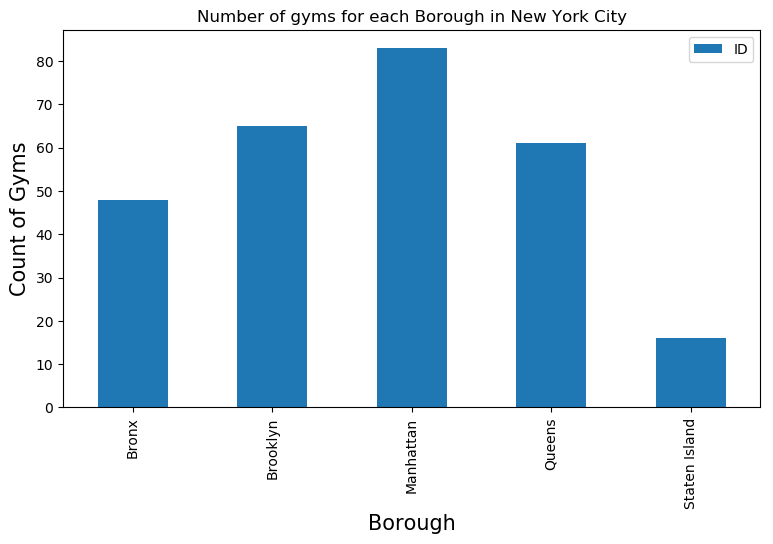

In [167]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of gyms for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('Count of Gyms', fontsize=15)
#giving a bar plot
gyms_rest_ny.groupby('Borough')['ID'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [176]:
df_fin_ppb= []
df_fin_ppb = pd.merge(df_fin_density,gyms_rest_ny.groupby('Borough')['ID'].count(), on= 'Borough')
df_fin_ppb["ppGym"] = df_fin_ppb["Density"]/df_fin_ppb["ID"]

df_fin_ppb


,Borough,Density,ID,ppGym
0,Bronx,13231,48,275.645833
1,Brooklyn,14649,65,225.369231
2,Manhattan,27826,83,335.253012
3,Queens,8354,61,136.950820
4,Staten Island,3132,16,195.750000


## Check the number of people per person in each Borough

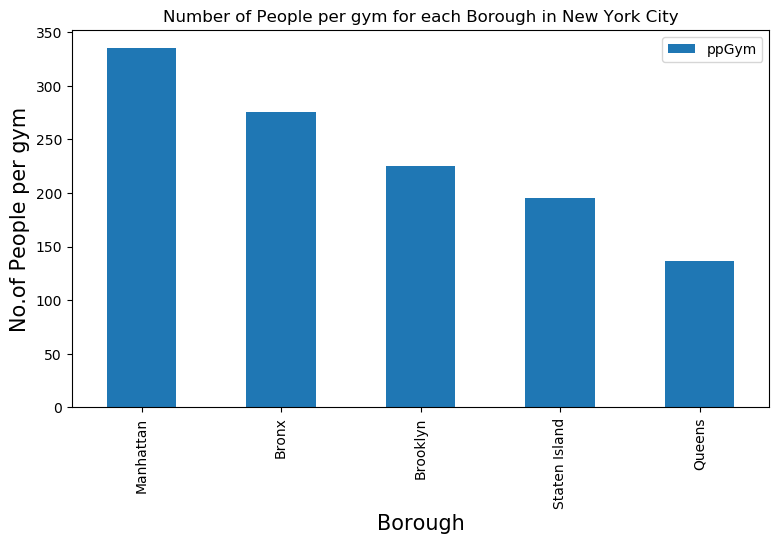

In [283]:

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of People per gym for each Borough in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of People per gym', fontsize=15)
#giving a bar plot
df_fin_ppb.groupby('Borough')['ppGym'].sum().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [263]:
Map_gyms = pd.merge(new_york_df,gyms_rest_ny,on = 'Neighborhood')
Map_gyms = Map_gyms[['Borough_x','Neighborhood','Latitude','Longitude','Name']]


In [264]:
Map_All = folium.Map(location=[Latitude, Longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, Neighborhood in zip(Map_gyms['Latitude'], Map_gyms['Longitude'], Map_gyms['Borough_x'], Map_gyms['Neighborhood']):
    label = '{}, {}'.format(Neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Map_All)  
    
Map_All

## Analyse each Neighborhood

In [265]:
Map_gyms["Cluster"] = 0

In [266]:
Map_gyms.loc[(Map_gyms['Borough_x'] == 'Bronx') ,'Cluster'] = '0'
Map_gyms.loc[(Map_gyms['Borough_x'] == 'Brooklyn') ,'Cluster'] = '1'
Map_gyms.loc[(Map_gyms['Borough_x'] == 'Manhattan') ,'Cluster'] = '2'
Map_gyms.loc[(Map_gyms['Borough_x'] == 'Queens') ,'Cluster'] = '3'
Map_gyms.loc[(Map_gyms['Borough_x'] == 'Staten Island') ,'Cluster'] = '4'
Map_gyms["Cluster"] = Map_gyms["Cluster"].astype(str).astype(int)
Map_gyms

,Borough_x,Neighborhood,Latitude,Longitude,Name,Cluster
0,Bronx,Eastchester,40.887556,-73.827806,Kinetic Sports Club,0
1,Bronx,Kingsbridge,40.881687,-73.902818,Blink Fitness,0
2,Bronx,Kingsbridge,40.881687,-73.902818,Astral Fitness & Wellness Center,0
3,Manhattan,Marble Hill,40.876551,-73.910660,Blink Fitness,2
4,Manhattan,Marble Hill,40.876551,-73.910660,Astral Fitness & Wellness Center,2
5,Bronx,Norwood,40.877224,-73.879391,Soma Health Club,0
6,Bronx,Norwood,40.877224,-73.879391,The Wolverine Cage,0
7,Bronx,Williamsbridge,40.881039,-73.857446,Blink Fitness,0
8,Bronx,Bedford Park,40.870185,-73.885512,APEX - Lehman College,0
9,Bronx,Morris Heights,40.847898,-73.919672,Blink Fitness,0


In [267]:
# create map
kclusters = 5
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Map_gyms['Latitude'], Map_gyms['Longitude'], Map_gyms['Neighborhood'], Map_gyms['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Number of gyms in each Neighborhood for Manhatten

In [269]:
Manhattan_neigh= Map_gyms[Map_gyms['Borough_x'] == 'Manhattan']

In [273]:
Manhattan_neigh = Manhattan_neigh.reset_index(drop = True)
Manhattan_neigh.groupby('Neighborhood').count()

,Borough_x,Latitude,Longitude,Name,Cluster
Neighborhood,,,,,
Battery Park City,4,4,4,4,4
Carnegie Hill,4,4,4,4,4
Central Harlem,2,2,2,2,2
Chelsea,3,3,3,3,3
Civic Center,1,1,1,1,1
Clinton,5,5,5,5,5
East Harlem,3,3,3,3,3
Financial District,2,2,2,2,2
Flatiron,4,4,4,4,4


In [274]:
Manhattan_gym = Manhattan_neigh.groupby('Neighborhood').count()

In [276]:
Manhattan_gym = Manhattan_gym[["Borough_x"]]

In [277]:
Manhattan_gym

,Borough_x
Neighborhood,
Battery Park City,4
Carnegie Hill,4
Central Harlem,2
Chelsea,3
Civic Center,1
Clinton,5
East Harlem,3
Financial District,2
Flatiron,4


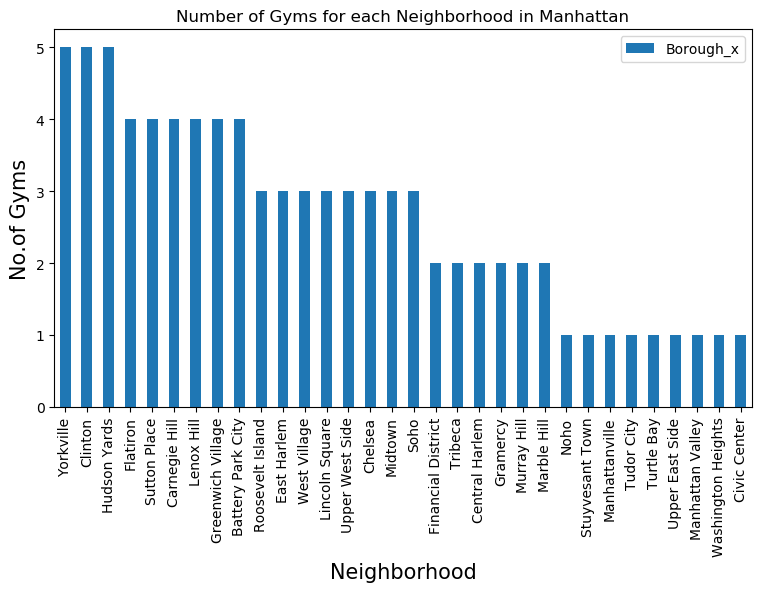

In [282]:

plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Gyms for each Neighborhood in Manhattan')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Gyms', fontsize=15)
#giving a bar plot
Manhattan_gym.groupby('Neighborhood')['Borough_x'].sum().nlargest(50).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

## Map the Neeighborhood in New York

In [284]:
Manhattan_neigh_map= Map_gyms[Map_gyms['Borough_x'] == 'Manhattan']

In [298]:
Manhattan_neigh_map = Manhattan_neigh_map.reset_index(drop = True)
df_Man_change = Manhattan_neigh_map.groupby('Neighborhood').first()
df_Man_changeNew = pd.merge(df_Man_change,Manhattan_gym,on='Neighborhood')
df_Man_changeNew = df_Man_changeNew[["Latitude","Longitude","Borough_x_y"]]
df_Man_changeNew

,Latitude,Longitude,Borough_x_y
Neighborhood,,,
Battery Park City,40.711932,-74.016869,4
Carnegie Hill,40.782683,-73.953256,4
Central Harlem,40.815976,-73.943211,2
Chelsea,40.744035,-74.003116,3
Civic Center,40.715229,-74.005415,1
Clinton,40.759101,-73.996119,5
East Harlem,40.792249,-73.944182,3
Financial District,40.707107,-74.010665,2
Flatiron,40.739673,-73.990947,4


In [300]:
# set number of clusters
kclusters = 6

manhattan_grouped_clustering = df_Man_changeNew

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 2, 1, 4, 2, 5, 0, 5], dtype=int32)

In [304]:
Man_map = Map_gyms[Map_gyms['Borough_x'] == 'Manhattan'] #all data
Man_map = Man_map.reset_index(drop = True)

,Borough_x,Neighborhood,Latitude,Longitude,Name,Cluster
0,Manhattan,Marble Hill,40.876551,-73.910660,Blink Fitness,2
1,Manhattan,Marble Hill,40.876551,-73.910660,Astral Fitness & Wellness Center,2
2,Manhattan,Washington Heights,40.851903,-73.936900,Blink Fitness,2
3,Manhattan,Manhattanville,40.816934,-73.957385,Blink Fitness,2
4,Manhattan,Central Harlem,40.815976,-73.943211,Lt Joseph P Kennedy Jr Community Center Gym,2
5,Manhattan,Central Harlem,40.815976,-73.943211,Blink Fitness,2
6,Manhattan,East Harlem,40.792249,-73.944182,Women's World of Boxing,2
7,Manhattan,East Harlem,40.792249,-73.944182,Club Normandie,2
8,Manhattan,East Harlem,40.792249,-73.944182,Crossfit Metropolis,2
9,Manhattan,Upper East Side,40.775639,-73.960508,Equinox East 85th Street,2


In [309]:
# add clustering labels
df_Man_changeNew.insert(0, 'Cluster Labels', kmeans.labels_)
df_Man_changeNew



,Cluster Labels,Latitude,Longitude,Borough_x_y
Neighborhood,,,,
Battery Park City,0,40.711932,-74.016869,4
Carnegie Hill,0,40.782683,-73.953256,4
Central Harlem,3,40.815976,-73.943211,2
Chelsea,2,40.744035,-74.003116,3
Civic Center,1,40.715229,-74.005415,1
Clinton,4,40.759101,-73.996119,5
East Harlem,2,40.792249,-73.944182,3
Financial District,5,40.707107,-74.010665,2
Flatiron,0,40.739673,-73.990947,4


In [310]:
Final_map_Manhattan = pd.merge(Man_map,df_Man_changeNew,on = 'Neighborhood')
Final_map_Manhattan

,Borough_x,Neighborhood,Latitude_x,Longitude_x,Name,Cluster,Cluster Labels,Latitude_y,Longitude_y,Borough_x_y
0,Manhattan,Marble Hill,40.876551,-73.910660,Blink Fitness,2,3,40.876551,-73.910660,2
1,Manhattan,Marble Hill,40.876551,-73.910660,Astral Fitness & Wellness Center,2,3,40.876551,-73.910660,2
2,Manhattan,Washington Heights,40.851903,-73.936900,Blink Fitness,2,1,40.851903,-73.936900,1
3,Manhattan,Manhattanville,40.816934,-73.957385,Blink Fitness,2,1,40.816934,-73.957385,1
4,Manhattan,Central Harlem,40.815976,-73.943211,Lt Joseph P Kennedy Jr Community Center Gym,2,3,40.815976,-73.943211,2
5,Manhattan,Central Harlem,40.815976,-73.943211,Blink Fitness,2,3,40.815976,-73.943211,2
6,Manhattan,East Harlem,40.792249,-73.944182,Women's World of Boxing,2,2,40.792249,-73.944182,3
7,Manhattan,East Harlem,40.792249,-73.944182,Club Normandie,2,2,40.792249,-73.944182,3
8,Manhattan,East Harlem,40.792249,-73.944182,Crossfit Metropolis,2,2,40.792249,-73.944182,3
9,Manhattan,Upper East Side,40.775639,-73.960508,Equinox East 85th Street,2,1,40.775639,-73.960508,1


In [313]:
# create map
map_clusters = folium.Map(location=[Latitude, Longitude], zoom_start=15)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Final_map_Manhattan['Latitude_x'], Final_map_Manhattan['Longitude_x'], Final_map_Manhattan['Neighborhood'], Final_map_Manhattan['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters